# Real State Sales Prediction

## Business Problem
Connecticut, located in the New England region of the Northeastern United States, has a diverse and dynamic real estate market. Real estate professionals, property investors, and homeowners are continually seeking accurate forecasts for property sales. Accurate predictions can assist in making informed decisions related to property investments, pricing strategies, and market trends. 

The objective of this project is to develop predictive models that can effectively forecast real estate sales in Connecticut. This involves using historical real estate sales data and leveraging machine learning techniques to make accurate predictions for future sales. 

## Project Roadmap
The project was executed through the following steps:
* Import the data
* Preprocess the data
* Descriptive statistics
* Exploratory data analysis
* Contruct the Linear Regression Model
* Evaluate the Linear Regression Model
* Contruct the Decision Tree Model
* Evaluate the Decision Tree Model
* Key Findings
* Model Comparision

## About Dataset
I have taken this real-world dataset from data.gov.

This real estate sales data pertains to Connecticut, which is situated as the southernmost state in the New England region of the Northeastern United States

Here's the link to the dataset:

https://catalog.data.gov/dataset/real-estate-sales-2001-2018

In [1]:
# Import Necessary Libraries
# Computation Libraries
import pandas as pd
import numpy as np
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting styles
sns.set_style("darkgrid", {'axes.grid' : False}) 
# plt.style.use('dark_background')

In [3]:
df = pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv', low_memory=False)
df.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.5957,Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
df.shape

(997213, 14)

In [5]:
df.dtypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
OPM remarks          object
Location             object
dtype: object

In [6]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


## Preprocess Data

### Missing Values 

In [8]:
df.isnull().sum()

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64

There too many missing values in these columns:
* Property Type 
* Residential Type
* Non Use Code 
* Assessor Remarks 
* OPM remarks
* Location. 

The missing values count in "Date Recorded" and "Address" columns is not significant.

Let's deal with missing values in the data.

There are too many missing values in `Property Type` column. Let's create a `None` category for these missing values.

In [9]:
df['Property Type'].replace(np.nan, 'None', inplace=True)
df['Property Type'].value_counts()

Property Type
Single Family     401612
None              382446
Condo             105420
Residential        60728
Two Family         26408
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64

There are too many missing values in `Residential Type` column. Let's create a `None` category for these missing values.

In [10]:
df['Residential Type'].replace(np.nan, 'None', inplace=True)
df['Residential Type'].value_counts()

Residential Type
Single Family    445016
None             388309
Condo            117780
Two Family        29609
Three Family      14081
Four Family        2418
Name: count, dtype: int64

There are too many missing values in `Non Use Code` column. Let's create a `None` category for these missing values.

In [11]:
df['Non Use Code'].replace(np.nan, 'None', inplace=True)
df['Non Use Code'].head(10)

0                  None
1                  None
2                  None
3                  None
4                  None
5                  None
6    08 - Part Interest
7                  None
8                  None
9                  None
Name: Non Use Code, dtype: object

There are too many missing values in `Assessor Remarks` column. Let's create a `None` category for these missing values.

In [12]:
df['Assessor Remarks'].replace(np.nan, 'None', inplace=True)
df['Assessor Remarks'].value_counts()

Assessor Remarks
None                                                                      847349
ESTATE SALE                                                                 5044
BELOW MARKET                                                                2568
SHORT SALE                                                                  2510
NEW CONSTRUCTION                                                            2048
                                                                           ...  
estate sale;per verification house substan worse than as of assmt date         1
SOLD W/ GARAGE UNIT G-1                                                        1
sold less than market value                                                    1
no typical marketing/inconsistent value for area                               1
MOTIVATED SELLER -DIVORCE                                                      1
Name: count, Length: 66509, dtype: int64

There are too many missing values in `OPM Remarks` column. Let's create a `None` category for these missing values.

In [13]:
df['OPM remarks'].replace(np.nan, 'None', inplace=True)
df['OPM remarks'].value_counts()

OPM remarks
None                                                                987279
GOOD SALE PER MLS                                                      978
NO MLS                                                                 500
NEW CONSTRUCTION                                                       345
SHORT SALE PER MLS                                                     326
                                                                     ...  
REMODELED PER MLS - SEE PREVIOUS SALE #170076                            1
REO SALE - CASH ONLY SOLD AS IS                                          1
TWO SALES - ALSO SEE #1700209                                            1
NOT A VALID SALE PER TOWN SITE AND PER MLS SALE PRICE = $345,000         1
PER MLS CLOSING PRICE = $1,145,000                                       1
Name: count, Length: 4826, dtype: int64

There are too many missing values in `Location` column. Let's create a `None` category for these missing values.

In [14]:
df['Location'].replace(np.nan, 'None', inplace=True)
df['Location'].value_counts()

Location
None                          799516
POINT (-72.36336 41.97461)       181
POINT (-73.41854 41.13449)       145
POINT (-73.45225 41.096)          87
POINT (-73.06359 41.52255)        77
                               ...  
POINT (-73.11304 41.28284)         1
POINT (-72.73953 41.604)           1
POINT (-72.90545 41.68371)         1
POINT (-72.0768 41.94684)          1
POINT (-72.07006 41.53315)         1
Name: count, Length: 130530, dtype: int64

There are too many missing values in `Address` column. Let's create a `None` category for these missing values.

In [15]:
df['Address'].replace(np.nan, 'None', inplace=True)
df['Address'].value_counts()

Address
MULTI ADDRESSES            620
8 SOUTH RD                 420
51 OLD SPRINGFIELD RD      172
312 N BISHOP AVE           114
71 AIKEN ST                106
                          ... 
655 120 TALCOTTVILLE RD      1
414 SALMON BRK ST            1
21 BUTTERNUT KNL             1
59 BURNSIDE AVE UT 2 &       1
126 PERKINS AVE              1
Name: count, Length: 714372, dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Non Use Code        0
Assessor Remarks    0
OPM remarks         0
Location            0
dtype: int64

The missing value count is zero in all columns now let's start exploring this data. 

## Exploratory Data Analysis

In [18]:
df['Sale Amount'].describe()

count    9.972110e+05
mean     3.911520e+05
std      5.347276e+06
min      0.000000e+00
25%      1.400000e+05
50%      2.250000e+05
75%      3.650000e+05
max      5.000000e+09
Name: Sale Amount, dtype: float64

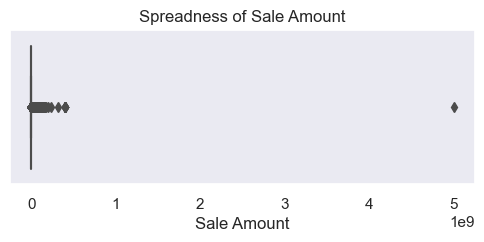

In [19]:
plt.figure(figsize=(6,2))
sns.boxplot(x='Sale Amount', data=df)
plt.title('Spreadness of Sale Amount')
plt.show()

There are several extreme outliers where sale amount is much more greater than the overall average sale amount.

Let's deal with these extreme outliers

In [20]:
df['Sale Amount'].describe(percentiles=[0.25,0.5,0.75,0.80,0.85,0.90,0.95])

count    9.972110e+05
mean     3.911520e+05
std      5.347276e+06
min      0.000000e+00
25%      1.400000e+05
50%      2.250000e+05
75%      3.650000e+05
80%      4.150000e+05
85%      4.910000e+05
90%      6.300000e+05
95%      9.750000e+05
max      5.000000e+09
Name: Sale Amount, dtype: float64

It can be seen that the data points after 95 percentile are extreme outliers.

Let's remove these extreme outliers from our analysis.

In [21]:
prcntle_95 = np.percentile(df['Sale Amount'], 95)
df_update = df[df['Sale Amount']<prcntle_95]
print('Shape after before extreme outliers: ',df.shape)
print('Shape after removing extreme outliers: ', df_update.shape)
print('Outliers removed: ', df.shape[0]-df_update.shape[0])

Shape after before extreme outliers:  (997211, 14)
Shape after removing extreme outliers:  (947242, 14)
Outliers removed:  49969


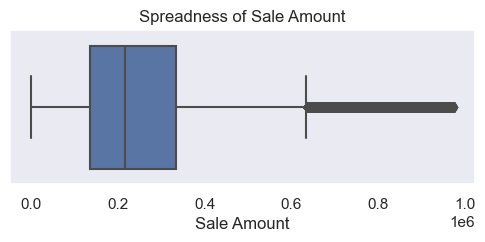

In [22]:
plt.figure(figsize=(6,2))
sns.boxplot(x='Sale Amount', data=df_update)
plt.title('Spreadness of Sale Amount')
plt.show()

After removing extreme outliers now the plot is readable.

There are still outliers present in sale amount but we were able to deal with extreme outliers.

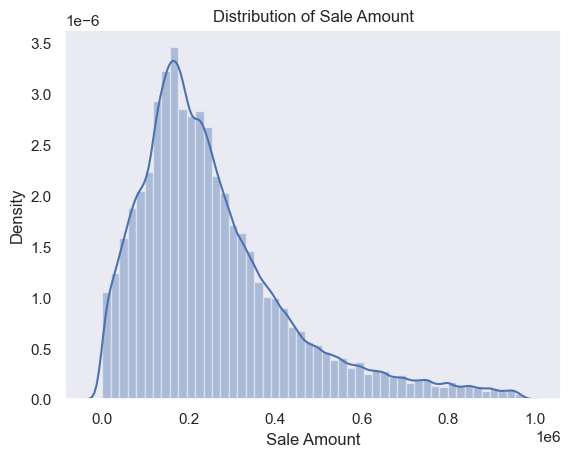

In [23]:
sns.distplot(df_update['Sale Amount'])
plt.title('Distribution of Sale Amount')
plt.show()

The distribution of `sale amount` is right skewed. It is expected because of the presence of extreme ouliers where `sale amount` is much greater than the overall average `sale amount`.

In [24]:
df_update['Assessed Value'].describe()

count    9.472420e+05
mean     2.111890e+05
std      1.206014e+06
min      0.000000e+00
25%      8.533000e+04
50%      1.329000e+05
75%      2.070800e+05
max      1.389588e+08
Name: Assessed Value, dtype: float64

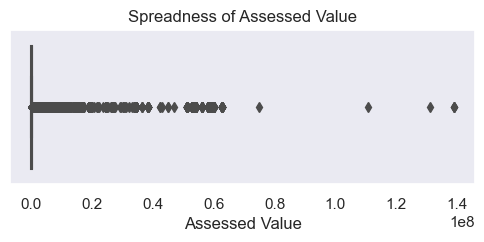

In [25]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df_update['Assessed Value'])
plt.title('Spreadness of Assessed Value')
plt.show()

There are several extreme outliers where assessed value is much more greater than the overall average assessed value.

Let's deal with these extreme outliers

In [26]:
df_update['Assessed Value'].describe(percentiles=(0.25,0.5,0.75,0.85,0.90,0.95))

count    9.472420e+05
mean     2.111890e+05
std      1.206014e+06
min      0.000000e+00
25%      8.533000e+04
50%      1.329000e+05
75%      2.070800e+05
85%      2.676100e+05
90%      3.210200e+05
95%      4.260495e+05
max      1.389588e+08
Name: Assessed Value, dtype: float64

It can be seen that the data points after 95 percentile are extreme outliers.

Let's remove these extreme outliers from our analysis.

In [27]:
shape_before = df_update.shape
print('Shape before extreme outliers: ',shape_before)

Shape before extreme outliers:  (947242, 14)


In [28]:
prcntle_95 = np.percentile(df_update['Assessed Value'], 95)
df_update = df_update[df_update['Assessed Value']<prcntle_95]
print('Shape after removing extreme outliers: ', df_update.shape)
print('Outliers removed: ', shape_before[0]-df_update.shape[0])

Shape after removing extreme outliers:  (899879, 14)
Outliers removed:  47363


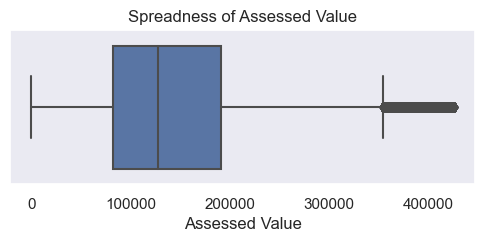

In [29]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df_update['Assessed Value'])
plt.title('Spreadness of Assessed Value')
plt.show()

After removing extreme outliers now the plot is readable.

There are still outliers present in assessed value but we were able to deal with extreme outliers.

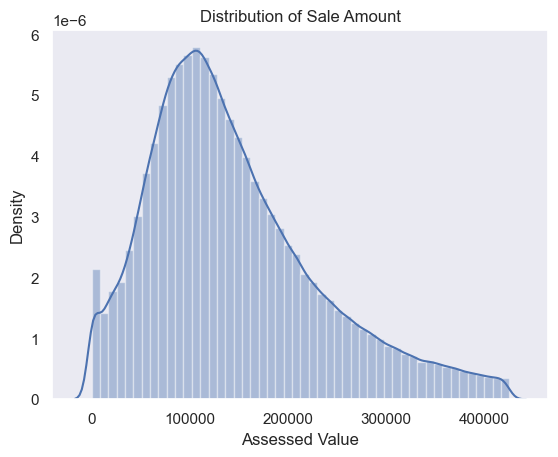

In [30]:
sns.distplot(df_update['Assessed Value'])
plt.title('Distribution of Sale Amount')
plt.show()

The distribution plot of assessed value is right skewed. It is expected because of the presence of extreme ouliers where assessed value is much greater than the overall average assessed value.

The data points needs to be inspected from source where assessed value is zero.

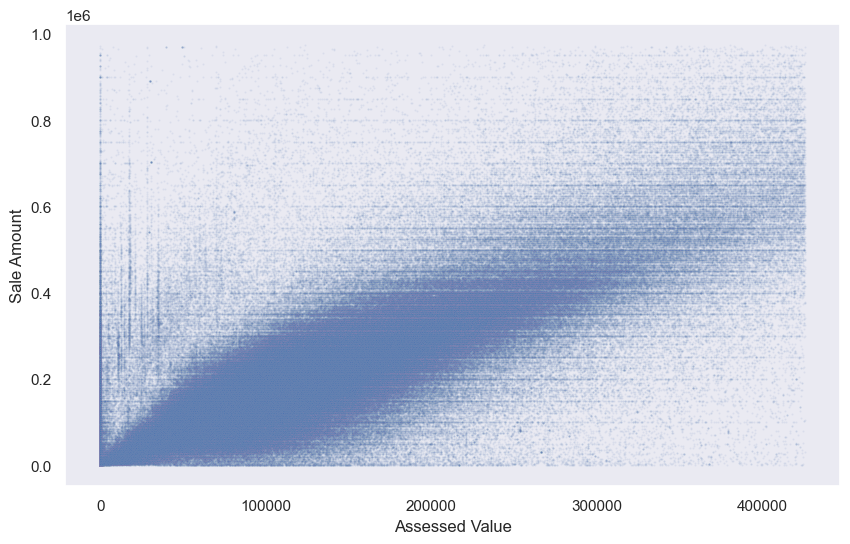

In [31]:
# Customize the scatter plot appearance using scatter_kws
plt.figure(figsize=(10,6))
scatter_kws = {'s': 2, 'alpha': 0.1}
sns.scatterplot(x='Assessed Value', 
                y='Sale Amount', 
                data=df_update, 
                **scatter_kws)
plt.show()

The scatter plot between sale amount and assessed value clearly shows positive correlation.

In [32]:
df_update['Sales Ratio'].describe()

count    899879.000000
mean          6.598446
std         962.287176
min           0.000000
25%           0.481534
50%           0.617576
75%           0.775553
max      368680.000000
Name: Sales Ratio, dtype: float64

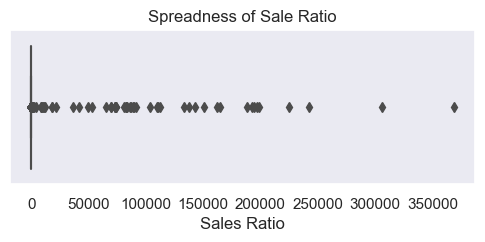

In [33]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df_update['Sales Ratio'])
plt.title('Spreadness of Sale Ratio')
plt.show()

There are several extreme outliers where Sales Ratio is much more greater than the overall average Sales Ratio.

Let's deal with these extreme outliers

In [34]:
df_update['Sales Ratio'].describe(percentiles=(0.25,0.5,0.75,0.85,0.90,0.95))

count    899879.000000
mean          6.598446
std         962.287176
min           0.000000
25%           0.481534
50%           0.617576
75%           0.775553
85%           0.930968
90%           1.112597
95%           1.579601
max      368680.000000
Name: Sales Ratio, dtype: float64

It can be seen that the data points after 95 percentile are extreme outliers.

Let's remove these extreme outliers from our analysis.

In [35]:
shape_before = df_update.shape
print('Shape before extreme outliers: ',shape_before)

Shape before extreme outliers:  (899879, 14)


In [36]:
prcntle_95 = np.percentile(df_update['Sales Ratio'], 95)
df_update = df_update[df_update['Sales Ratio']<prcntle_95]
print('Shape after removing extreme outliers: ', df_update.shape)
print('Outliers removed: ', shape_before[0]-df_update.shape[0])

Shape after removing extreme outliers:  (854885, 14)
Outliers removed:  44994


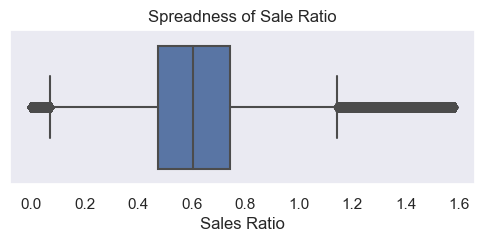

In [37]:
plt.figure(figsize=(6,2))
sns.boxplot(x=df_update['Sales Ratio'])
plt.title('Spreadness of Sale Ratio')
plt.show()

After removing extreme outliers now the plot is readable.

There are still outliers present in Sales Ratio but we were able to deal with extreme outliers.

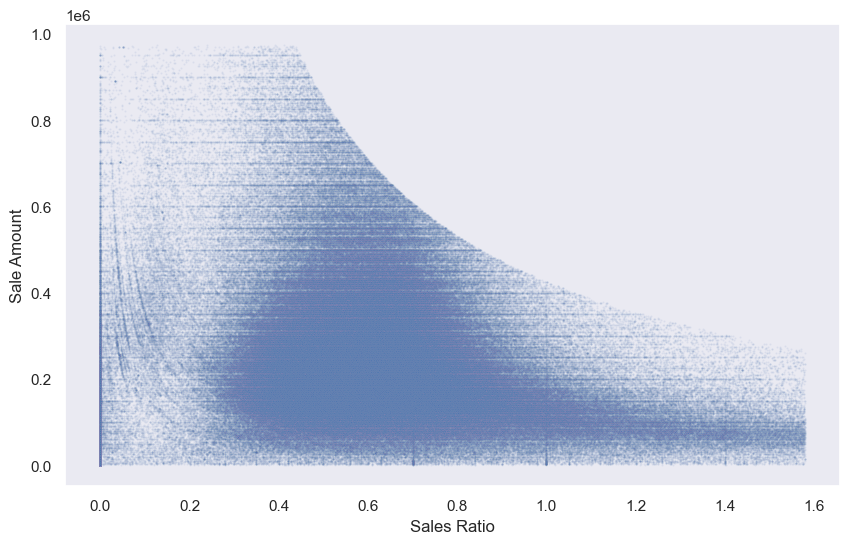

In [38]:
# Customize the scatter plot appearance using scatter_kws
plt.figure(figsize=(10,6))
scatter_kws = {'s': 2, 'alpha': 0.1}
sns.scatterplot(x='Sales Ratio', 
                y='Sale Amount', 
                data=df_update, 
                **scatter_kws)
plt.show()

Interesting the scatterplot trend between sales amount and sales ratio show slightly negative correlation. I expected positive correlation here.

In [39]:
print('Minimum "List Year":', df_update['List Year'].min())
print('Maximun "List Year":', df_update['List Year'].max())

Minimum "List Year": 2001
Maximun "List Year": 2020


The minimum "List Year" in this dataset is 2001.

The maximum "List Year" in this dataset is 2020.

In [40]:
df_update['List Year'].value_counts()

List Year
2004    75664
2003    58749
2020    57174
2005    56441
2001    55381
2002    54362
2019    50316
2018    44503
2006    41688
2016    41503
2014    40365
2015    39768
2017    39000
2009    33259
2013    32700
2007    30267
2012    28383
2008    27208
2010    25707
2011    22447
Name: count, dtype: int64

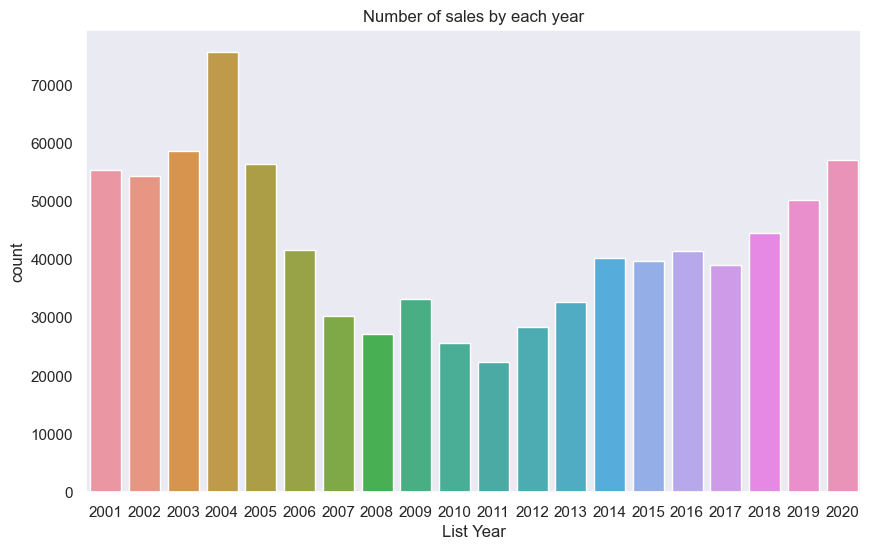

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x='List Year', data=df_update)
plt.title('Number of sales by each year')
plt.show()

The number of sales were smooth from 2001 to 2005 except for the year 2004 where number of sales are more than 70000.

The dip in number of sales starts from 2006 to 2013.

The number of sales start increasing from 2013 to 2020.

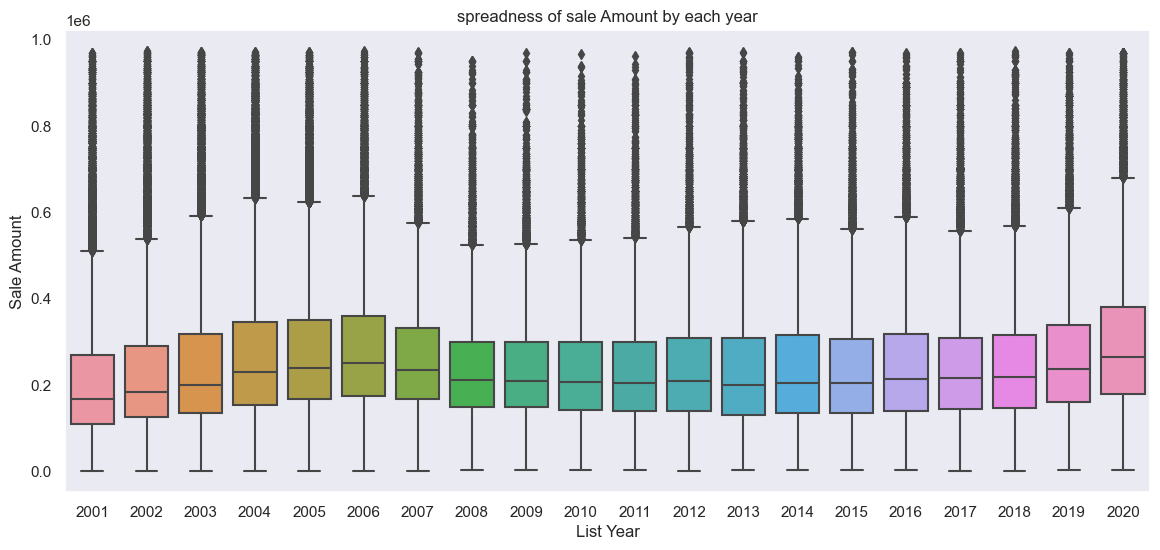

In [42]:
plt.figure(figsize=(14,6))
sns.boxplot(x='List Year', y='Sale Amount', data=df_update)
plt.title('spreadness of sale Amount by each year')
plt.show()

The median of sale amount increases from 2001 to 2006.

The median of sale amount almost stays constant from 2008 to 2018.

The median of sale amount increases from 2019 to 2020.

In [43]:
df_update['Date Recorded'].describe()

count         854885
unique          6263
top       08/01/2005
freq             786
Name: Date Recorded, dtype: object

In [44]:
df_update['Date Recorded'] = pd.to_datetime(df_update['Date Recorded'])
df_update['Date Recorded'].head()

0   2021-09-13
1   2020-10-02
2   2021-03-09
7   2021-07-01
9   2020-12-16
Name: Date Recorded, dtype: datetime64[ns]

Converted date from object type to datetime type.

In [45]:
df_update.groupby('Date Recorded').agg({'Sale Amount':'count'})

,Sale Amount
Date Recorded,
1999-04-05,1
2001-08-01,1
2001-09-04,1
2001-09-05,1
2001-09-25,1
...,...
2021-09-24,167
2021-09-27,290
2021-09-28,220


In [46]:
df_update['Town'].describe()

count         854885
unique           170
top       Bridgeport
freq           27939
Name: Town, dtype: object

In [47]:
pd.DataFrame(df_update['Town'].value_counts())

,count
Town,
Bridgeport,27939
Stamford,24625
Waterbury,24371
Norwalk,19350
Danbury,18960
...,...
Scotland,394
Bridgewater,362
Canaan,359


There are **170** unique towns in this dataset.

Tha last town is named \*\*\*Unknown***. This needs to be inspected.

In [48]:
town_count=pd.DataFrame(df_update['Town'].value_counts()).reset_index()
town_count.head(10)

,Town,count
0,Bridgeport,27939
1,Stamford,24625
2,Waterbury,24371
3,Norwalk,19350
4,Danbury,18960
5,New Haven,18901
6,West Hartford,18725
7,Hartford,17514
8,Milford,16254
9,Meriden,16134


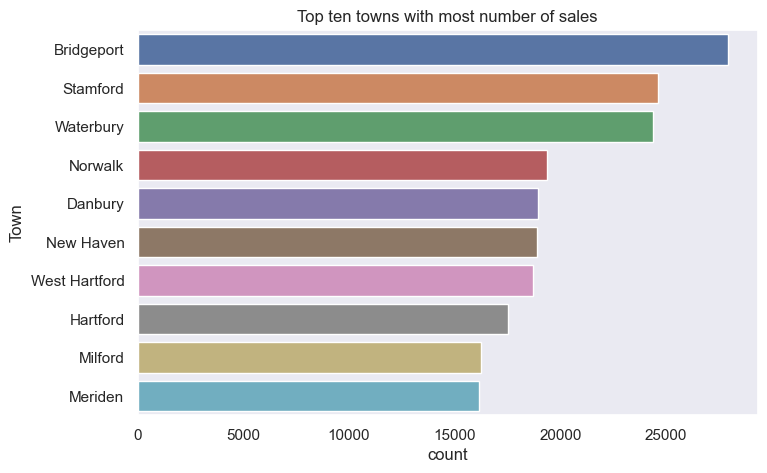

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(y='Town', x='count' ,data=town_count.head(10))
plt.title('Top ten towns with most number of sales')
plt.show()

Bridgeport is at top with number of sales greater than 25000.

Mriden is at the 10th position with number of sales greater than 15000.

In [50]:
df_update['Address'].describe()

count              854885
unique             626153
top       MULTI ADDRESSES
freq                  404
Name: Address, dtype: object

In [51]:
df_update['Address'].value_counts()

Address
MULTI ADDRESSES          404
71 AIKEN ST              106
166 OLD BROOKFIELD RD     90
25 GRAND ST               76
50 AIKEN ST               71
                        ... 
79 NEW RD                  1
38 ARLINGTON DR            1
309 OLD TOWN FARM RD       1
22 KENINGTON RD            1
126 PERKINS AVE            1
Name: count, Length: 626153, dtype: int64

There are several data points with the same addresses.

In [52]:
df_update['Property Type'].describe()

count     854885
unique        12
top         None
freq      333985
Name: Property Type, dtype: object

In [53]:
p_typ=pd.DataFrame(df_update['Property Type'].value_counts()).reset_index()
p_typ

,Property Type,count
0,None,333985
1,Single Family,332928
2,Condo,97898
3,Residential,53088
4,Two Family,21434
5,Three Family,9832
6,Vacant Land,2592
7,Four Family,1635
8,Commercial,1061
9,Apartments,338


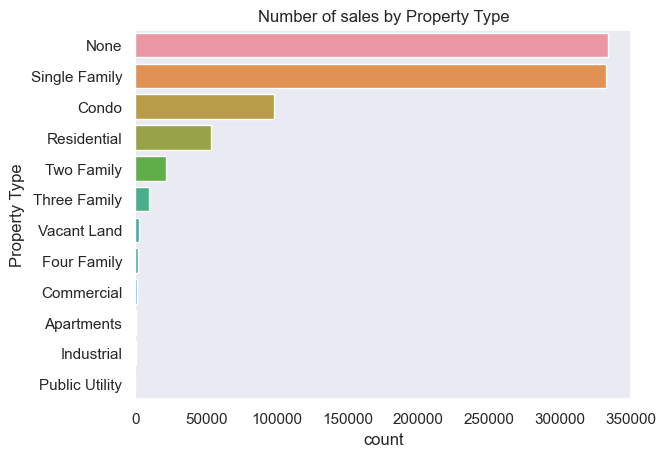

In [54]:
sns.barplot(y='Property Type', x='count',data=p_typ)
plt.title('Number of sales by Property Type')
plt.show()

The most number of sales are by single family followed by condo and residential property types.

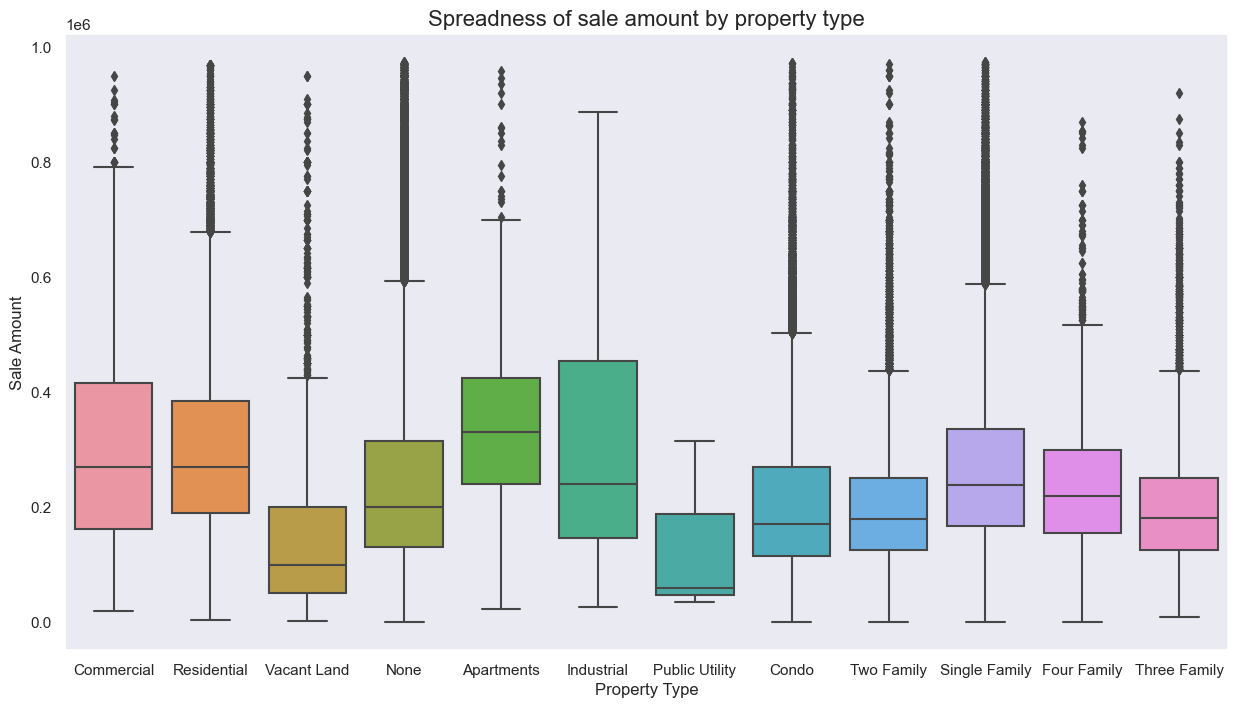

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Property Type', y='Sale Amount', data=df_update)
plt.title('Spreadness of sale amount by property type', fontsize=16)
plt.show()

In [56]:
df_update['Residential Type'].describe()

count            854885
unique                6
top       Single Family
freq             369537
Name: Residential Type, dtype: object

In [57]:
r_typ=pd.DataFrame(df_update['Residential Type'].value_counts()).reset_index()
r_typ

,Residential Type,count
0,Single Family,369537
1,None,338070
2,Condo,109616
3,Two Family,24496
4,Three Family,11284
5,Four Family,1882


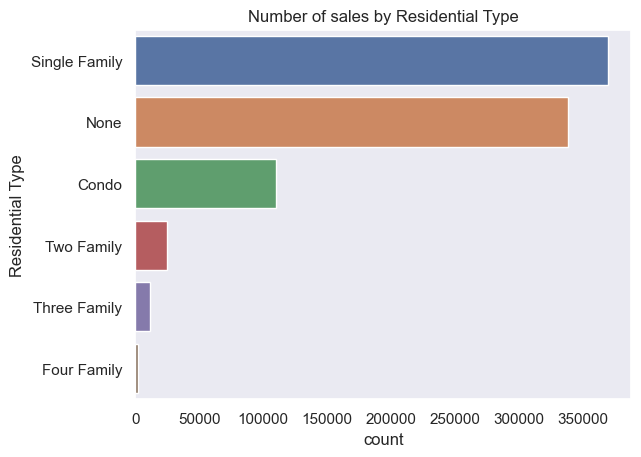

In [58]:
sns.barplot(y='Residential Type', x='count', data=r_typ)
plt.title('Number of sales by Residential Type')
plt.show()

The most number of sales are by single family followed by condo and two family residential types.

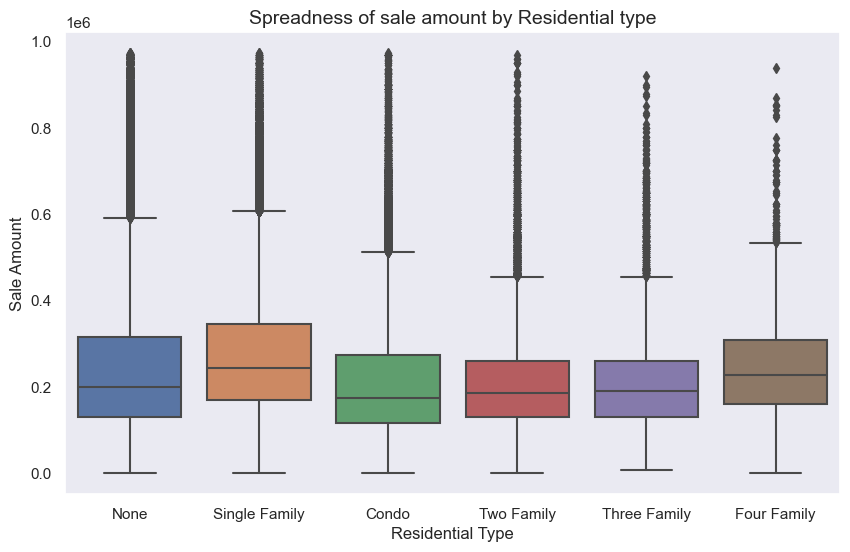

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Residential Type', y='Sale Amount', data=df_update)
plt.title('Spreadness of sale amount by Residential type', fontsize=14)
plt.show()

The sales amount seem equally spread across residential types.

### Feature Engineering

In [60]:
df_update['Day Recorded'] = df_update['Date Recorded'].dt.day
df_update['Month Recorded'] = df_update['Date Recorded'].dt.month
df_update['Year Recorded'] = df_update['Date Recorded'].dt.year
df_update['Weekday Recorded'] = df_update['Date Recorded'].dt.weekday
df_update.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Day Recorded,Month Recorded,Year Recorded,Weekday Recorded
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,None,None,None,None,None,13,9,2021,0
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,None,None,None,None,2,10,2020,4
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.7248,Residential,Condo,None,None,None,None,9,3,2021,1
7,2020313,2020,2021-07-01,Berlin,216 WATCH HILL RD,412000.0,677500.0,0.6081,Residential,Single Family,None,None,None,None,1,7,2021,3
9,20139,2020,2020-12-16,Bethel,16 DEEPWOOD DRIVE,171360.0,335000.0,0.5115,Residential,Single Family,None,None,None,None,16,12,2020,2


### Correlation

#### Isolate categorical variables

In [61]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854885 entries, 0 to 997211
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     854885 non-null  int64         
 1   List Year         854885 non-null  int64         
 2   Date Recorded     854885 non-null  datetime64[ns]
 3   Town              854885 non-null  object        
 4   Address           854885 non-null  object        
 5   Assessed Value    854885 non-null  float64       
 6   Sale Amount       854885 non-null  float64       
 7   Sales Ratio       854885 non-null  float64       
 8   Property Type     854885 non-null  object        
 9   Residential Type  854885 non-null  object        
 10  Non Use Code      854885 non-null  object        
 11  Assessor Remarks  854885 non-null  object        
 12  OPM remarks       854885 non-null  object        
 13  Location          854885 non-null  object        
 14  Day Recor

In [62]:
df_update.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location', 'Day Recorded', 'Month Recorded', 'Year Recorded',
       'Weekday Recorded'],
      dtype='object')

In [63]:
cat_var_list = ['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
                'Property Type', 'Residential Type', 'Non Use Code', 'Assessor Remarks', 
                'OPM remarks', 'Location']
df_corr = df_update.drop(cat_var_list, axis=1)

In [64]:
df_corr.corr()

,Assessed Value,Sale Amount,Sales Ratio,Day Recorded,Month Recorded,Year Recorded,Weekday Recorded
Assessed Value,1.000000,0.767175,0.251461,-0.003759,0.019241,0.221556,-0.013749
Sale Amount,0.767175,1.000000,-0.277675,-0.003672,0.012045,0.032487,0.000965
Sales Ratio,0.251461,-0.277675,1.000000,0.003251,-0.001401,0.293687,-0.017258
Day Recorded,-0.003759,-0.003672,0.003251,1.000000,-0.024107,-0.004985,0.027891
Month Recorded,0.019241,0.012045,-0.001401,-0.024107,1.000000,-0.031501,-0.019909
Year Recorded,0.221556,0.032487,0.293687,-0.004985,-0.031501,1.000000,-0.056659
Weekday Recorded,-0.013749,0.000965,-0.017258,0.027891,-0.019909,-0.056659,1.000000


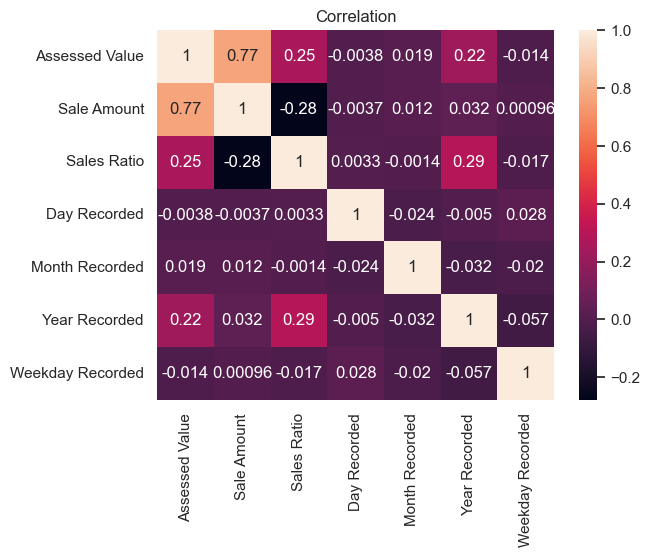

In [65]:
# Create correlation heatmap
sns.heatmap(df_corr.corr(), annot=True)
plt.title('Correlation')
plt.show()

The correlation between `Sale Amount` and `Assessed Value` is **0.77**.

The correlation between `Sale Amount` and `Sales Ratio` is **-0.28**.

## Construct the linear regression model

In [66]:
# Packages for OLS, MLR, confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [67]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854885 entries, 0 to 997211
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Serial Number     854885 non-null  int64         
 1   List Year         854885 non-null  int64         
 2   Date Recorded     854885 non-null  datetime64[ns]
 3   Town              854885 non-null  object        
 4   Address           854885 non-null  object        
 5   Assessed Value    854885 non-null  float64       
 6   Sale Amount       854885 non-null  float64       
 7   Sales Ratio       854885 non-null  float64       
 8   Property Type     854885 non-null  object        
 9   Residential Type  854885 non-null  object        
 10  Non Use Code      854885 non-null  object        
 11  Assessor Remarks  854885 non-null  object        
 12  OPM remarks       854885 non-null  object        
 13  Location          854885 non-null  object        
 14  Day Recor

### Remove unwanted features

In [68]:
drop_list = ['Serial Number', 'Date Recorded', 'Address', 'Non Use Code', 
             'Assessor Remarks', 'OPM remarks', 'Location']

In [69]:
X = df_update.drop(drop_list+['Sale Amount'], axis=1)
y = df_update['Sale Amount']

X.head()

,List Year,Town,Assessed Value,Sales Ratio,Property Type,Residential Type,Day Recorded,Month Recorded,Year Recorded,Weekday Recorded
0,2020,Ansonia,150500.0,0.4630,Commercial,None,13,9,2021,0
1,2020,Ashford,253000.0,0.5883,Residential,Single Family,2,10,2020,4
2,2020,Avon,130400.0,0.7248,Residential,Condo,9,3,2021,1
7,2020,Berlin,412000.0,0.6081,Residential,Single Family,1,7,2021,3
9,2020,Bethel,171360.0,0.5115,Residential,Single Family,16,12,2020,2


In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 854885 entries, 0 to 997211
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   List Year         854885 non-null  int64  
 1   Town              854885 non-null  object 
 2   Assessed Value    854885 non-null  float64
 3   Sales Ratio       854885 non-null  float64
 4   Property Type     854885 non-null  object 
 5   Residential Type  854885 non-null  object 
 6   Day Recorded      854885 non-null  int32  
 7   Month Recorded    854885 non-null  int32  
 8   Year Recorded     854885 non-null  int32  
 9   Weekday Recorded  854885 non-null  int32  
dtypes: float64(2), int32(4), int64(1), object(3)
memory usage: 58.7+ MB


In [71]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [72]:
X['List Year'] = X['List Year'].astype(str)
X['Year Recorded'] = X['Year Recorded'].astype(str)
X = pd.get_dummies(X, drop_first=True)
X.head()

,Assessed Value,Sales Ratio,Day Recorded,Month Recorded,Weekday Recorded,List Year_2002,List Year_2003,List Year_2004,List Year_2005,List Year_2006,...,Year Recorded_2012,Year Recorded_2013,Year Recorded_2014,Year Recorded_2015,Year Recorded_2016,Year Recorded_2017,Year Recorded_2018,Year Recorded_2019,Year Recorded_2020,Year Recorded_2021
0,150500.0,0.4630,13,9,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,253000.0,0.5883,2,10,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,130400.0,0.7248,9,3,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,412000.0,0.6081,1,7,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,171360.0,0.5115,16,12,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.05397735 -0.64140492 -0.30139792 ... -0.23859696 -0.25772353
   4.42199874]
 [ 1.22097272 -0.15425354 -1.46727417 ... -0.23859696  3.88012686
  -0.22614208]
 [-0.1748676   0.3764421  -0.72535292 ... -0.23859696 -0.25772353
   4.42199874]
 ...
 [-0.88212372  1.0513781   1.18244459 ...  4.19116817 -0.25772353
  -0.22614208]
 [-0.27676622 -0.19313234  1.18244459 ... -0.23859696  3.88012686
  -0.22614208]
 [ 0.6558054   0.38227392 -1.36128542 ... -0.23859696  3.88012686
  -0.22614208]]


In [74]:
# create training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [75]:
# Initiate the model and fit into the training data
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

## Evaluate the linear regression model

### Model performance on the training data

In [76]:
# Evaluate the model performance on the training data
print('Coefficient of determination: ', LR.score(X_train, y_train))

Coefficient of determination:  0.8358721885105173


In [77]:
y_pred_train = LR.predict(X_train)

In [78]:
print('R^2: ', r2_score(y_train, y_pred_train))
print('MAE: ',mean_absolute_error(y_train, y_pred_train))
print('MSE: ', mean_squared_error(y_train, y_pred_train))
print('RMSE: ', np.sqrt(mean_squared_error(y_train, y_pred_train)))

R^2:  0.8358721885105173
MAE:  35442.887121666005
MSE:  3718293075.003755
RMSE:  60977.80805345298


### Model performance on the testing data

In [79]:
# Evaluate the model performance on the testing data
print('Coefficient of determination: ', LR.score(X_test, y_test))

Coefficient of determination:  0.8357293808167604


In [80]:
y_pred_test = LR.predict(X_test)

In [81]:
print('R^2: ', r2_score(y_test, y_pred_test))
print('MAE: ',mean_absolute_error(y_test, y_pred_test))
print('MSE: ', mean_squared_error(y_test, y_pred_test))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred_test)))

R^2:  0.8357293808167604
MAE:  35251.16197580342
MSE:  3686755188.916763
RMSE:  60718.656020343224


### Execute Logistic Regression Results

In [82]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': y_pred_test.ravel(),
                        'residual': y_test - y_pred_test}
                      )
results.head()

,actual,predicted,residual
258125,875000.0,626525.271031,248474.728969
33599,160000.0,234960.021031,-74960.021031
84677,220000.0,233845.396031,-13845.396031
957561,400000.0,359833.130406,40166.869594
746785,258500.0,284822.130406,-26322.130406


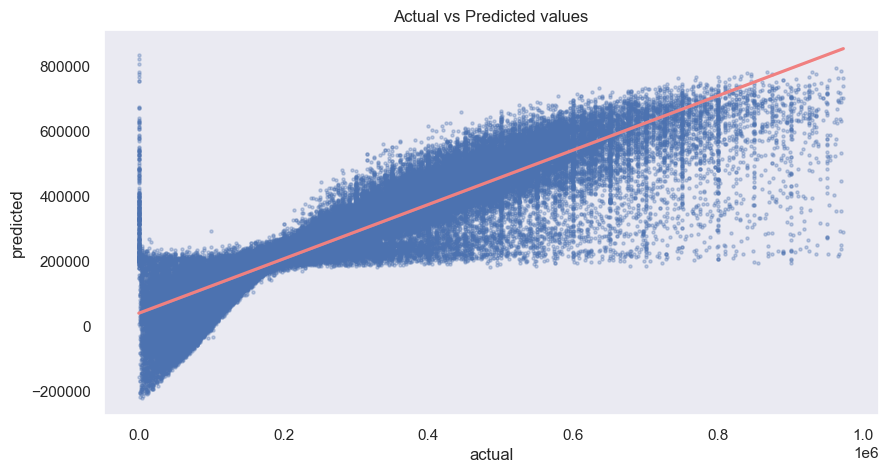

In [83]:
plt.figure(figsize=(10,5))
sns.regplot(x='actual', 
            y='predicted', 
            data=results, 
            scatter_kws = {'s': 5, 'alpha': 0.3}, 
            line_kws={"color": "lightcoral"})
plt.title('Actual vs Predicted values')
plt.show()

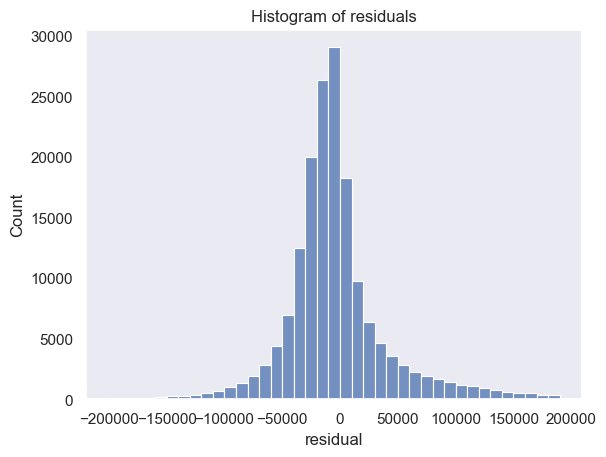

In [84]:
# Visualize the distribution of the `residuals`
sns.histplot(results['residual'], bins=np.arange(-200000,200000, 10000))
plt.title('Histogram of residuals')
plt.show()

In [85]:
# Calculate residual mean
results['residual'].mean()

-144.07219877812366

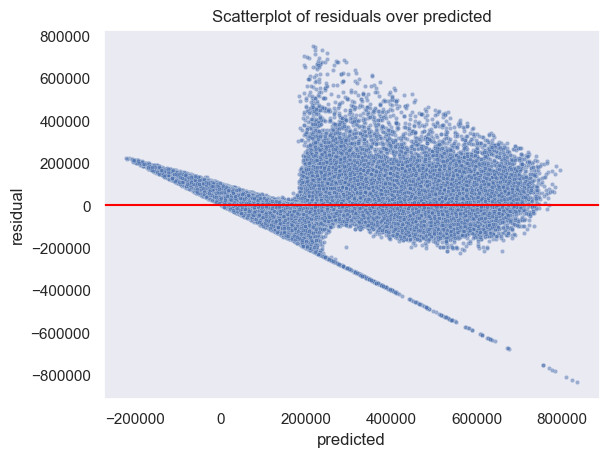

In [86]:
# Create a scatterplot of `residuals` over `predicted`
scatter_kws = {'s': 10, 'alpha': 0.5}
sns.scatterplot(x=results['predicted'], y=results['residual'], **scatter_kws)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

## Construct decision tree model

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## Evaluate decision tree model

In [89]:
# Evaluate the model performance on the testing data
print('Coefficient of determination: ', tree.score(X_test, y_test))

Coefficient of determination:  0.9841343370823653


In [90]:
tree_y_pred = tree.predict(X_test)

In [91]:
print('R^2: ', r2_score(y_test, tree_y_pred))
print('MAE: ',mean_absolute_error(y_test, tree_y_pred))
print('MSE: ', mean_squared_error(y_test, tree_y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, tree_y_pred)))

R^2:  0.9841343370823653
MAE:  1745.769502851659
MSE:  356075939.6782136
RMSE:  18869.974554254535


### Execute Logistic Regression Results

In [92]:
# Create a `results` dataframe
results = pd.DataFrame({'actual': y_test,
                        'predicted': tree_y_pred.ravel(),
                        'residual': y_test - tree_y_pred}
                      )
results.head()

,actual,predicted,residual
258125,875000.0,875000.0,0.0
33599,160000.0,160000.0,0.0
84677,220000.0,220000.0,0.0
957561,400000.0,400000.0,0.0
746785,258500.0,260000.0,-1500.0


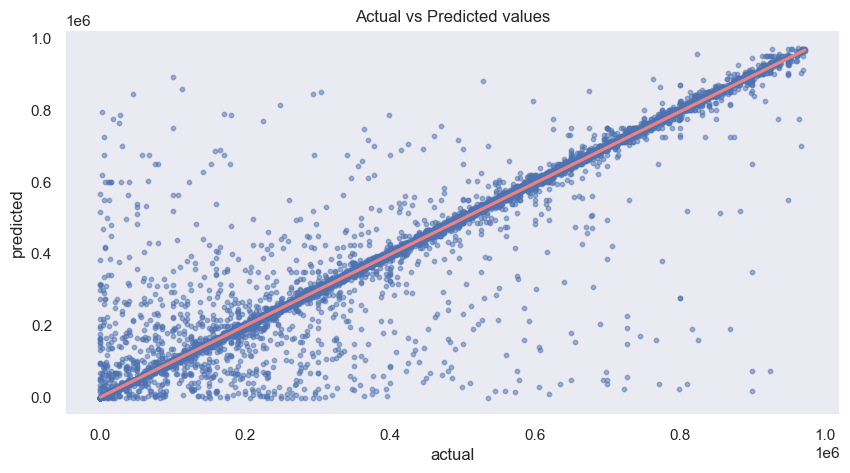

In [93]:
plt.figure(figsize=(10,5))
sns.regplot(x='actual', 
            y='predicted', 
            data=results, 
            scatter_kws = {'s': 10, 'alpha': 0.5}, 
            line_kws={"color": "lightcoral"})
plt.title('Actual vs Predicted values')
plt.show()

In [94]:
# Calculate residual mean
results['residual'].mean()

8.712244096689082

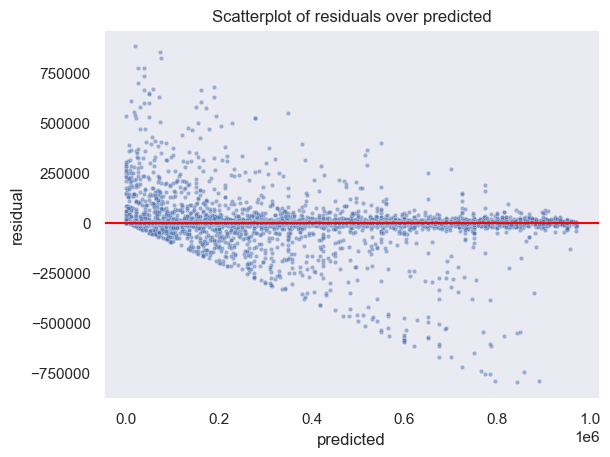

In [95]:
# Create a scatterplot of `residuals` over `predicted`
scatter_kws = {'s': 10, 'alpha': 0.5}
sns.scatterplot(x=results['predicted'], y=results['residual'], **scatter_kws)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted')
plt.show()

## Key Findings

* The distribution of sale amount is right skewed. It is expected because of the presence of extreme ouliers where sale amount is much greater than the overall average sale amount.
* The correlation between Sale Amount and Assessed Value is 0.77.
* The scatter plot between sale amount and assessed value clearly shows positive correlation.
* The scatterplot trend between sales amount and sales ratio show slightly negative correlation.
* The number of sales were smooth from 2001 to 2005 except for the year 2004 where number of sales are more than 70000.
* The dip in number of sales starts from 2006 to 2013.
* The number of sales start increasing from 2013 to 2020.
* Bridgeport town is at top with number of sales greater than 25000.
* The most number of sales are by single family followed by condo and residential property types.
* The most number of sales are by single family followed by condo and two family residential types.

## Model Comparison

Logistic regression model performance on test data:


**Coefficient of determination:  83.57%**

    R^2:  0.8357293808167604
    MAE:  35251.16197580342
    MSE:  3686755188.916763
    RMSE:  60718.656020343224
    
Decision tree model performance on test data:

**Coefficient of determination:  98.41%**

    R^2:  0.9841343370823653
    MAE:  1745.769502851659
    MSE:  356075939.6782136
    RMSE:  18869.974554254535
    
These findings make it evident that the decision tree model, boasting a coefficient of determination of `98.41%`, outperformed the logistic regression model, which yielded a coefficient of determination of `83.57%`.